
# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

## Подготовительный этап 

### Изучение общей информации, составление плана работы
1. Откроем датасет
2. Исследуем столбцы и типы данных
3. Создадим промежуточный вывод: какие основные типы, а так же наличие пропусков в датасете
4. Создадим весь план работ
5. Опишем план и сделаем соответствующие параграфы

### Подготовка данных
1. Преобразование названий столбцов
2. Преобразовать данные в нужные типы
3. Обработка пропусков 
  * Объяснить способы заполнения пропусков
  * Описать причины появления пропусков
  * Описать подход к значениям "tbd"
4. Расчёт суммарных продаж по регионам и запись в отдельный столбец

### Исследовательских анализ данных
1. Сколько игр выпускалось в разные годы. 
  * Выбор периодов для исследования.
2. Изменения продаж по платформам с течением времени.
  * Выбор платформ с наибольшими суммарными продажами.
  * Гистограмма распределения по годам.
  * За какой характерный срок появляются новые и исчезают старые платформы?
3. Возьмем данные за актуальный период (который позволят построить прогноз на 2017 год).
  * Данные за предыдущие года не учитываем.
4. Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
5. График "ящик с усами" по глобальным продажам игр в разбивке по платформам.
6. Оценить влияение отзывов пользователей и критиков на продажи внутри одной популярной платформы.
  * Построить диаграмму рассеяния и посчитать кореляцию: отзывы-продажи. 
7. Соотнести вывода с продажами игр на других платформах.
8. Оценить распределение игр по жанрам. Какие жанры самые прибыльные? Выделяются ли жанры с высокими и низкими продажами?

### Портрет пользователя каждого региона
Для пользователя из Северной Америки, Европы, Японии и других стран.
1. Самые популярные платформы (топ-5). Различия в долях продаж.
2. Самые популярные жанры (топ-5).
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Проверка гипотез
1. Средние пользовательские рейтинги платформ Xbox One и РС не различаются;
2. Средние пользовательские рейтинги жанров Action и Sports различаются.

### Общий вывод
Выявить закономерности, определяющие успешность игры, чтобы спрогнозировать потенциально популярный продукт и спланировать маркетинговые кампании.

## Изучение данных из файла

In [1]:
# !pip install seaborn==0.11.1 -U
# обновление библиотеки

In [2]:
# импорт требуемых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn import preprocessing
from IPython.display import display_html
from IPython.core.display import display, HTML

%matplotlib inline
sns.set_style('darkgrid')

In [3]:
try:
    df = pd.read_csv('datasets/games.csv')
except FileNotFoundError:
    df = pd.read_csv('games.csv')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов и два разных типа данных. Тип данных: `float64` — 6 столбцов, `object` — 5 столбцов.

Согласно документации к данным:

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score`  — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

В названиях колонок есть нарушения стиля.

Количество значений в столбцах различается, значит в данных есть пропущенные значения.

In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
len(df['Name'].unique())

11560

Уникальных игр меньше, чем записей в таблице. Значит, некоторые игры выпускались на нескольких платформах.

Посмотрим, какие платформы у нас представлены.

In [8]:
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

Посмотрим на представленные жанры

In [9]:
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Присутствующий рейтинг

In [10]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

Уберем редкие значения, так как их мало и они существенно не повлияют на исследование.

In [11]:
# убираем редкие значения
df = df.loc[~df['Rating'].isin(['EC','K-A','RP','AO'])]

In [12]:
# проверим результат
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
Name: Rating, dtype: int64

In [13]:
# подсчет явных дубликатов
df.duplicated().sum()

0

### Вывод

**Выводы**

* В каждой строке таблицы данные о комьютерных играх. В столбцах указано название игр, их платформа, год выпуска, жанр, региональные продажи и рейтинг игр.

* Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, в столбцах нужно преобразовать названия.

* В некоторых столбцах необходимо поменять тип данных.
* В числовых столбцах аномалий нет, данные выглядят правдоподобно.
* Категориальные значения тоже выглядят приемлимо.
* Явных дубликатов в данных нет.

## Предобработка данных

### Обработка названий

Названия столбцов без ошибок, поэтому просто приведём их к нижнему регистру.

In [14]:
# изменение регистра
df.columns = df.columns.str.lower()

### Заполнение пропусков

 * Объяснить способы заполнения пропусков
 * Описать причины появления пропусков
 * Описать подход к значениям "tbd"

Проведем подсчет количества пропусков во всём датафрейме.

In [15]:
pd.DataFrame(df.isna().mean().round(4)*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
critic_score,51.31
rating,40.51
user_score,40.12
year_of_release,1.6
genre,0.01
name,0.01
other_sales,0
jp_sales,0
eu_sales,0
na_sales,0


В некоторых столбцах большое количество пропусков.

 **tbd**  
*Аббревиатура tbd (To Be Determined), то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода".*  
*В ответе на часто задаваемый вопрос на сайте авторитетного агрегатора обзоров игр `Metacritic`. Что такое `tbd`? Следующее:  
Чтобы гарантировать, что METASCORES точно отражает отзывы критиков о каком-либо конкретном фильме, игре, телешоу или альбоме, мы не отображаем METASCORES для тех элементов, которые не имеют по крайней мере четырех (4) отзывов в нашей базе данных. Как только будет достигнуто это минимальное количество отзывов, отобразится METASCORE.*  

**Вывод:** 
Следовательно можно сделать вывод, что значение не определено.

Заменим на `NaN`

In [16]:
# заменяем все значения tbd на NaN
# меняем тип данных на float
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float')

**Пропуски в столбце** `name`

In [17]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Ниже удалим эти 2 строки.

In [18]:
df = df.dropna(subset=['name', 'year_of_release']).reset_index(drop=True)

In [19]:
# посмотрим на пропуски
df.loc[df['critic_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [20]:
print('Пропуски в столбце "critic_score":', df.loc[df['critic_score'].isna()].shape[0])
 
print('Пропуски в столбце "user_score":', df.loc[df['user_score'].isna()].shape[0])

print('Пропуски в обоих столбцах сразу:', df.loc[df['critic_score'].isna() & df['user_score'].isna()].shape[0])

Пропуски в столбце "critic_score": 8451
Пропуски в столбце "user_score": 8974
Пропуски в обоих столбцах сразу: 7885


Большая часть пропусков совпадает, но заполнить их нечем, а следовательно, чтобы не исказить результаты исследования лучше их оставить.


**Пропуски в рейтинге ESRB**

Пропуски заполним значеним "no_rank", поскольку во многих регионах рейтинг не присваивается

In [21]:
df['rating'].fillna('no_rank', inplace=True)

In [22]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514333
user_score         0.546163
rating             0.000000
dtype: float64

Пропуски были обработаны во всех столбцах, кроме `critic_score` и `user_score`.

### Изменение типов данных

* `year` приведем к целочисленнному типу.
* `platform`, `genre`, `rating` преобразуем в категориальный тип.
* `user_score` уже преобразовали в вещественный

В ходе исследования пришлось отказаться от преобразования столбцов с указанием жанра `genre`, платформы `platform` и рейтинга `rating` в категориальный тип, так как графики некорректно отображались.

In [23]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16431 entries, 0 to 16430
Data columns (total 11 columns):
name               16431 non-null object
platform           16431 non-null object
year_of_release    16431 non-null int32
genre              16431 non-null object
na_sales           16431 non-null float64
eu_sales           16431 non-null float64
jp_sales           16431 non-null float64
other_sales        16431 non-null float64
critic_score       7980 non-null float64
user_score         7457 non-null float64
rating             16431 non-null object
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


### Расчет суммарных продаж по регионам и добавление в отдельный столбец

Создадим новый столбцец с суммарными продажами по регионам

In [25]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Вывод

* В столбце `user_score` были заменены значения "tbd" на NaN
  * значение "tbd" это аббревиатура от To Be Determined ("будет определено"), так что, вероятно, в этих наблюдениях оценки пользователей еще ожидаются - в текущих данных их нет.
  
* Строки с пропусками в столбцах `name` и `year_of_release` были удалены, так как их относительно мало в датасете.
* Большая часть пропусков всех строк в столбцах `user_score` и `critic_score`, при удалении пропусков там, результаты исследования могут быть искажены, поэтому было принятно решение оставить.
* Добавили столбец `sum_sales` с суммарными продажами каждой игры во всех регионах.

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы. Выбор периодов для исследования.

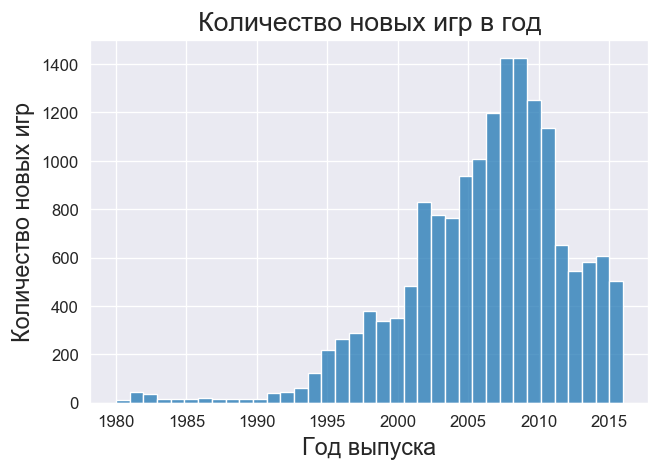

In [26]:
plt.figure(dpi=120)
sns.histplot(
    df['year_of_release'],
    bins=37   
)
plt.ylabel('Количество новых игр', fontsize=14)
plt.xlabel('Год выпуска', fontsize=14)
plt.title('Количество новых игр в год', fontsize=16);

**Вывод**
* Период до 1995 неактуален для исследовния, тогда выпускалось мало игр.
* Пик игровой индустрии пришелся на период  **2005 по 2011 год**.
* Далее произошел спад и количество новых игр сократилось примерно в 2 раза.( скорее всего индустрия нащупала актуальную жанровость и перешла к более качественным продуктам)

* В качестве **актуального периода для нашего исследования возьмем игры выпущенные с 2014 года и позже.**

### Изменения продаж по платформам с течением времени

  * Выбор платформ с наибольшими суммарными продажами.
  * Гистограмма распределения по годам.
  * За какой характерный срок появляются новые и исчезают старые платформы?
  
Для ответа на эти вопросы поработаем пока что с датасетом целиком.
Посмотрим сперва на самые топовые платформы **всех времён** (в рамках датасета: 1980-2016 гг).
  
Создадим сводную таблицу, где в качестве индексов `platform` и построим по ней гистограмму, чтобы отобрать топовые платформы для дальнейшего анализа.

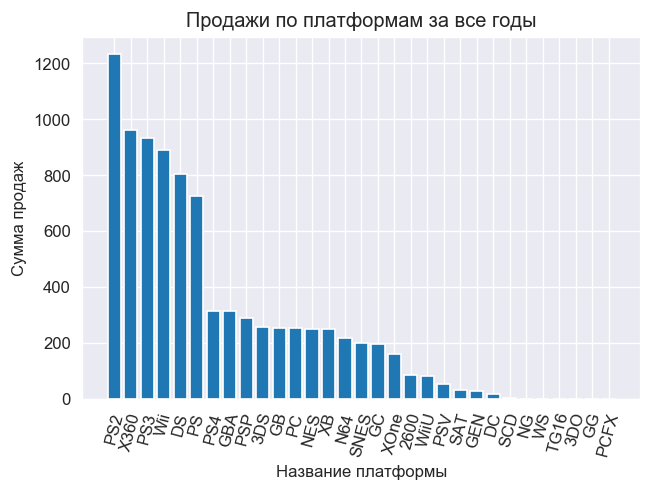

In [27]:
time_top_platforms = df.pivot_table(index='platform', 
                                    values='sum_sales', aggfunc='sum'
                                 ).sort_values(by='sum_sales', ascending=False)

plt.figure(dpi=120)
plt.bar(x=time_top_platforms.index, height=time_top_platforms['sum_sales'])
plt.title("Продажи по платформам за все годы")
plt.xlabel("Название платформы")
plt.xticks(rotation=75)
plt.ylabel("Сумма продаж");

Сразу можем заметить, что есть топ-6 по популярности платформ:
* PS2 - хит всех времён, более 1.2 млрд проданных копий игр
* X360
* PS3
* Wii
* DS
* PS

In [28]:
top_6_platforms = list(time_top_platforms.reset_index().head(6)['platform'])
top_6_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Для оценки времени жизни платформы посмотрим на динамику продаж для шести наиболее популярных платформ всех времен.

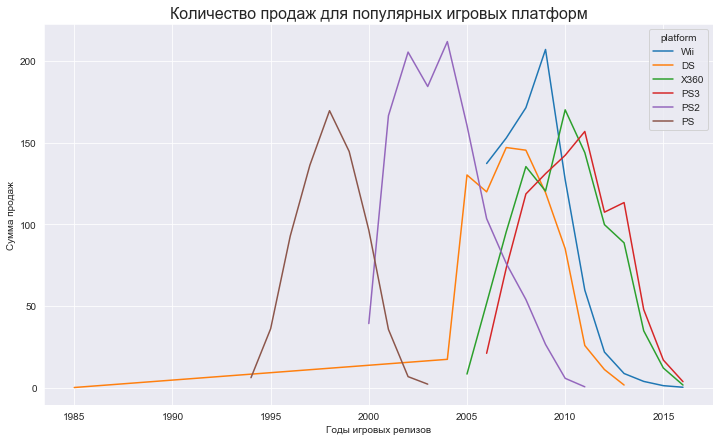

In [29]:
plt.figure(figsize=(12, 7))
plt.grid(True)
plt.title('Количество продаж для популярных игровых платформ', fontsize=16)
plt.xlabel('Годы игровых релизов')
plt.ylabel('Сумма продаж')

# строим линейные графики сумма продаж - год релиза для каждой платформы
sns.lineplot(
    data=df.query('platform.isin(@top_6_platforms)'),
    x='year_of_release',
    y='sum_sales',
    hue='platform',
    estimator='sum',
    ci=None
);

**Вывод**
* Приставки PlayStation сменяли друг друга от поколения к поколению, цикл службы оставался одинаковым (8-10 лет),стоит отметить тенденцию к снижению цикла службы, скорее всего это связано с увеличением требований к графике.
* Пик популярности приставок всех производителей приходится на 2008-2011 года и наступает спустя 5 лет после запуска платформы.
* К 2015-2016 году нет ни одной платформы, которую можно было бы назвать популярной.
* Этот факт логично объясняется тем, что со второй декады 21 века активно начали развиваться игры для мобильных платформ (телефонов, планшетов и т.д.)
* По этим графикам также можем предположить среднее время жизни платформы: 6-8 лет

Оценим среднее время жизни цикла платформы точнее, рассчитав среднее значение для всех платформ:

In [30]:
df_lifetime = df.pivot_table(
                index='platform', aggfunc={'year_of_release': ['min', 'max']}).reset_index()
df_lifetime['years_of_life'] = df_lifetime[('year_of_release', 'max')] - df_lifetime[('year_of_release', 'min')]

print('Среднее время жизни платформы', round(df_lifetime['years_of_life'].mean()), 'лет')

Среднее время жизни платформы 8.0 лет


### Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.

Чтобы выбрать платформы, которые могут принести прибыль в 2017 году, будем опираться на дату запуска платформы в периоде 2014-2016 годы, потому что:
* Пик количества продаж у платформы еще не наступил
* Есть несколько лет до окончания популярности
* Рынок компьютерных игр очень динамичен, данные старше 3-х лет уже не актуальны

**Далее в работе будем использовать срез датасета только за актуальный период, то есть, после 2014 года.**

In [31]:
# берем актуальные данные - релизы свежее 2014 года и платформы из топ-6 по сумме продаж
df_actual = df.query('year_of_release >= 2014')

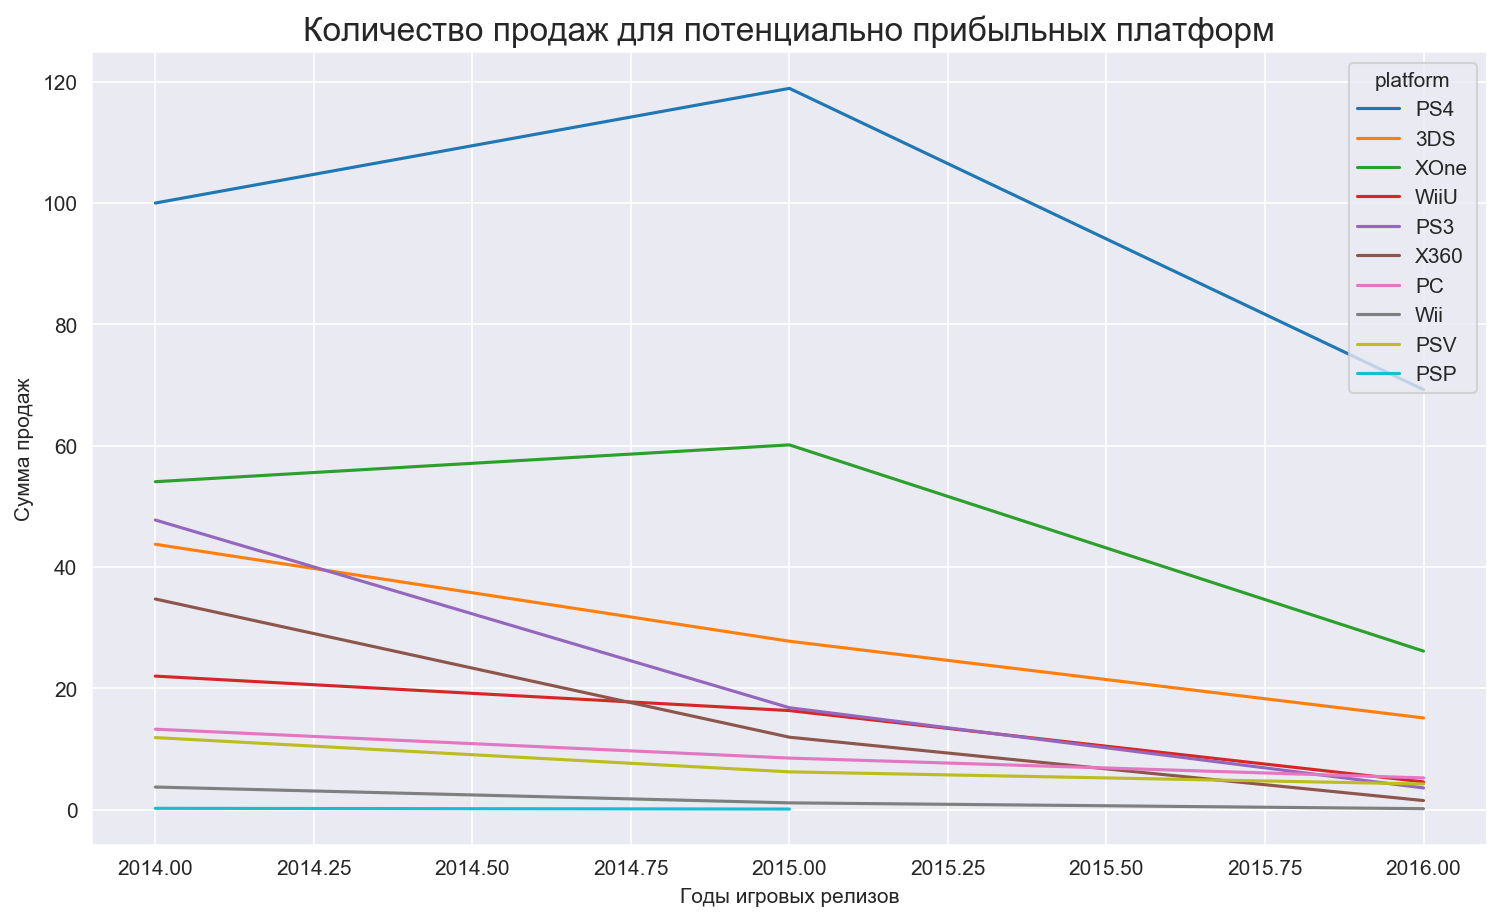

In [32]:
plt.figure(figsize=(12,7), dpi=150)
plt.grid(True)
plt.title('Количество продаж для потенциально прибыльных платформ', fontsize=16)
plt.xlabel('Годы игровых релизов')
plt.ylabel('Сумма продаж')
sns.lineplot(
    data=df_actual,
    x='year_of_release',
    y='sum_sales',
    hue='platform',
    estimator='sum',
    ci=None
);

**Вывод**
* Игровые платформы к 2016 году распределились следующим образом:
    * В этом временном периоде лидируют по продажам PS4 и XOne, потому что они только появились в 2013-2014 годах, однако и они уже прошли свой пик продаж и близятся к плато.
    * К 2016 году произошел спад продаж для всех платформ, поэтому **выделить потенциально прибыльные в 2017 году не представляется возможным**.

### График "ящик с усами" по глобальным продажам игр в разбивке по платформам.

In [33]:
# возьмем топ-7 платформ по количеству продаж после 2011 года
top_7_platform = (df_actual
                    .groupby('platform')['sum_sales'].sum()
                    .sort_values(ascending=False)
                    .head(7).index)
top_7_platform

Index(['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC'], dtype='object', name='platform')

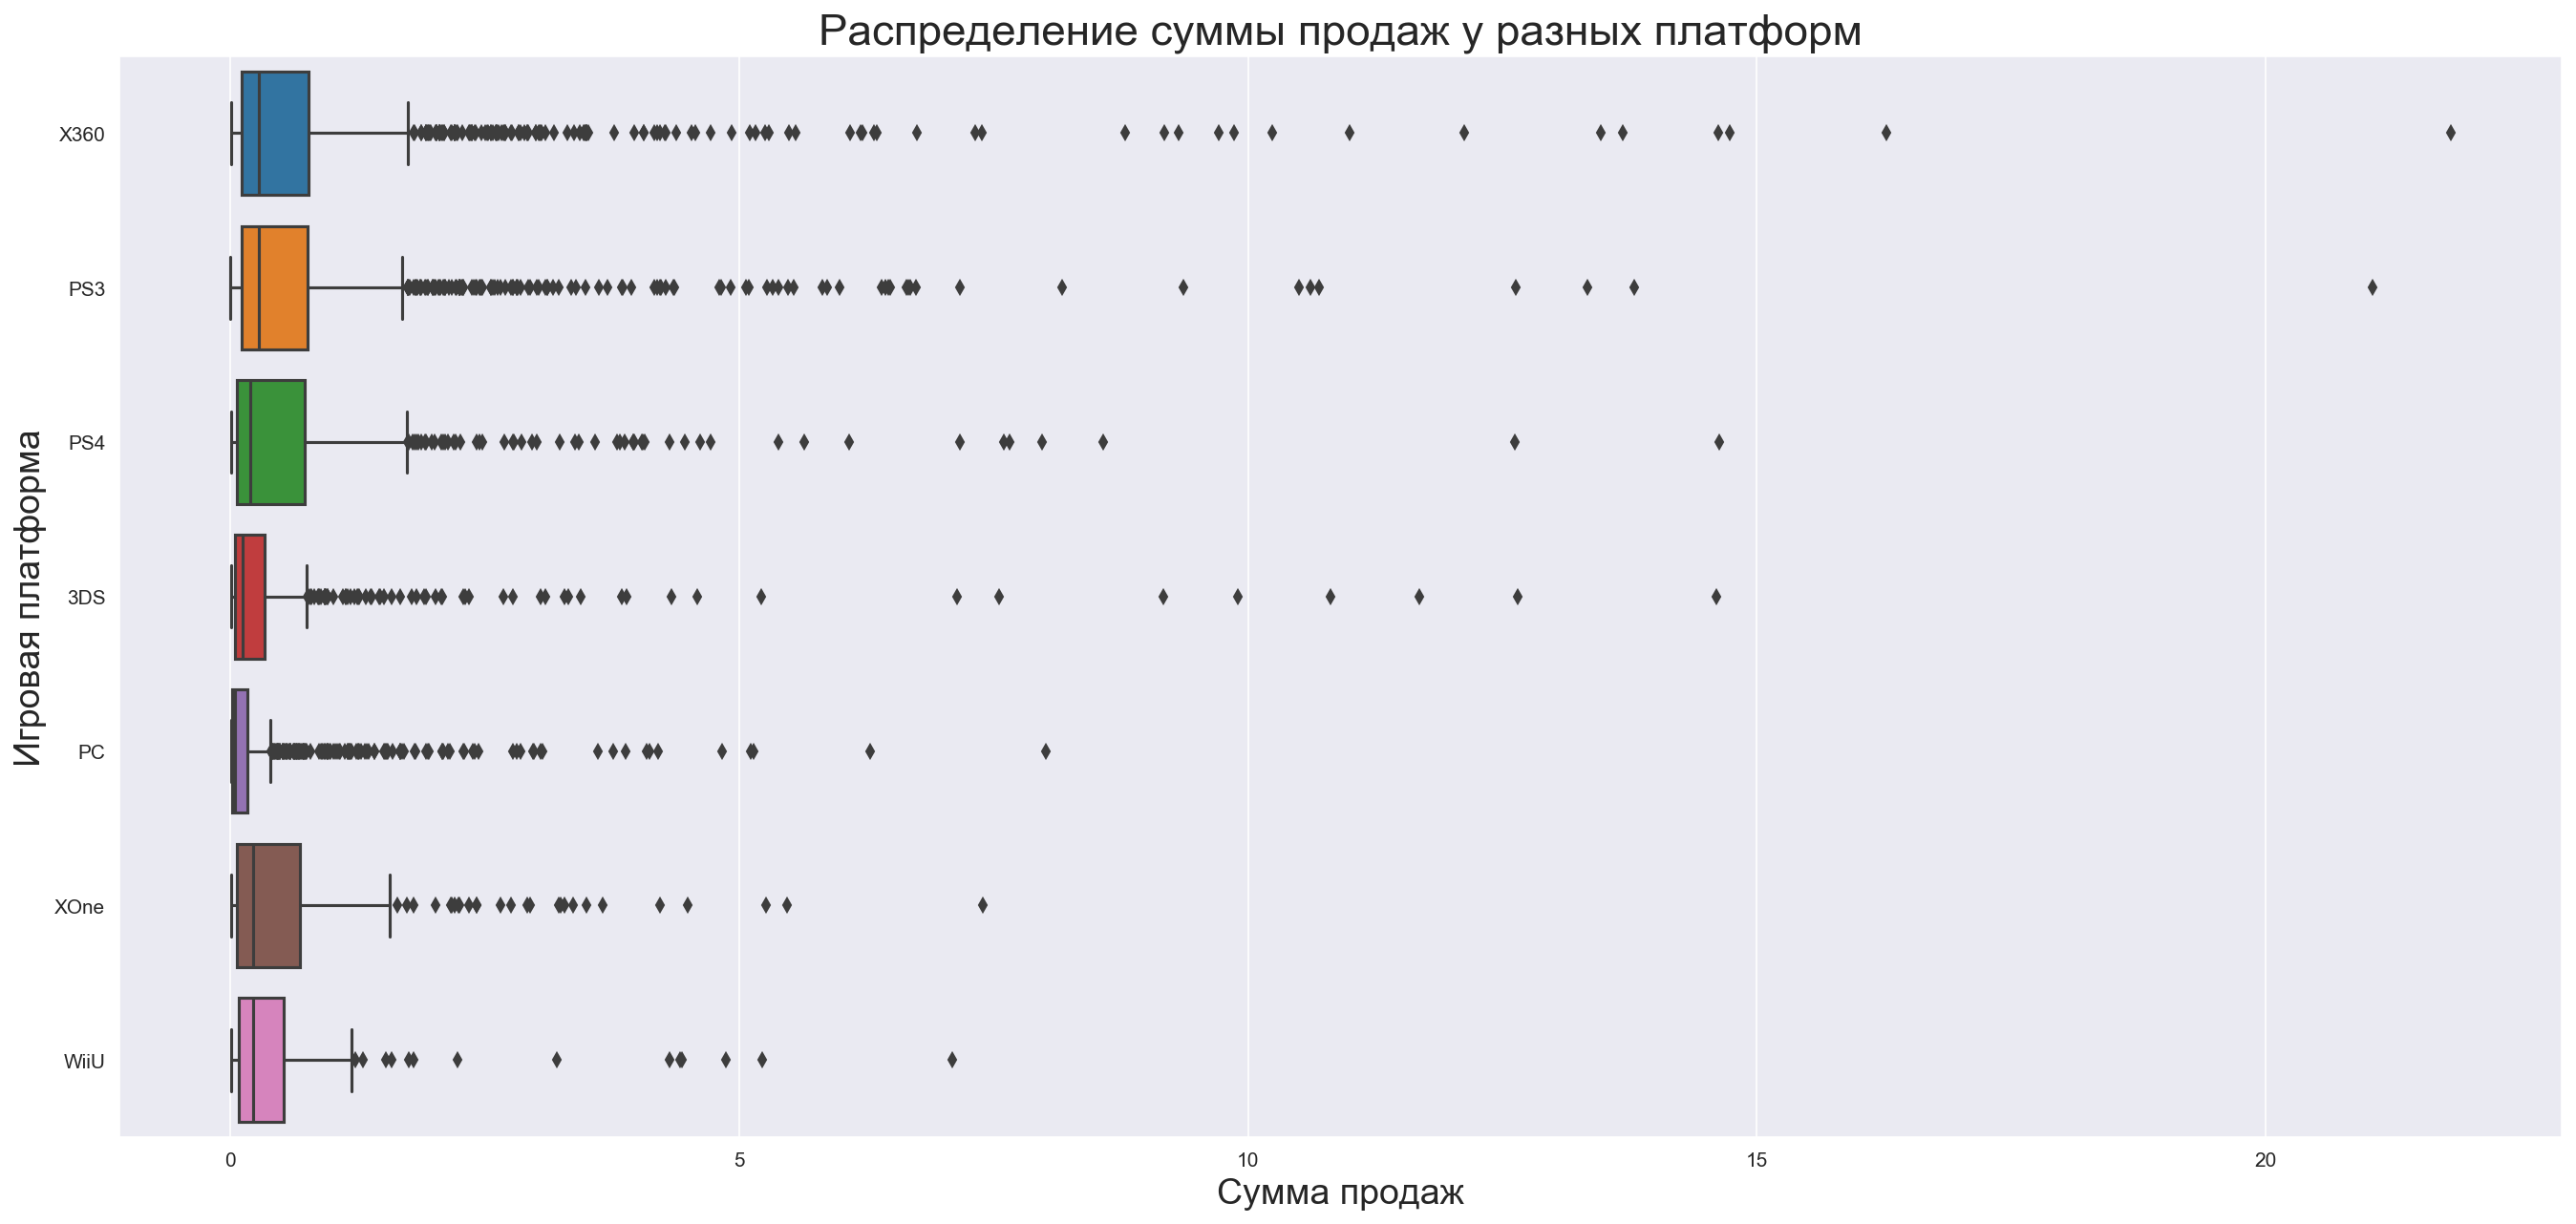

In [34]:
# построим диаграмму размаха
plt.figure(figsize=(22,10), dpi=150)
plt.grid(True)

sns.boxplot(
    data=df[df['platform'].isin(top_7_platform)],
    y='platform',
    x='sum_sales'
)
plt.title('Распределение суммы продаж у разных платформ', fontsize=22)
plt.xlabel('Сумма продаж', fontsize=18)
plt.ylabel('Игровая платформа', fontsize=18);

На диаграмме размаха видны только выбросы, и совсем не видны медиана и 75% квантиль, следуеь построить дополнительный график.

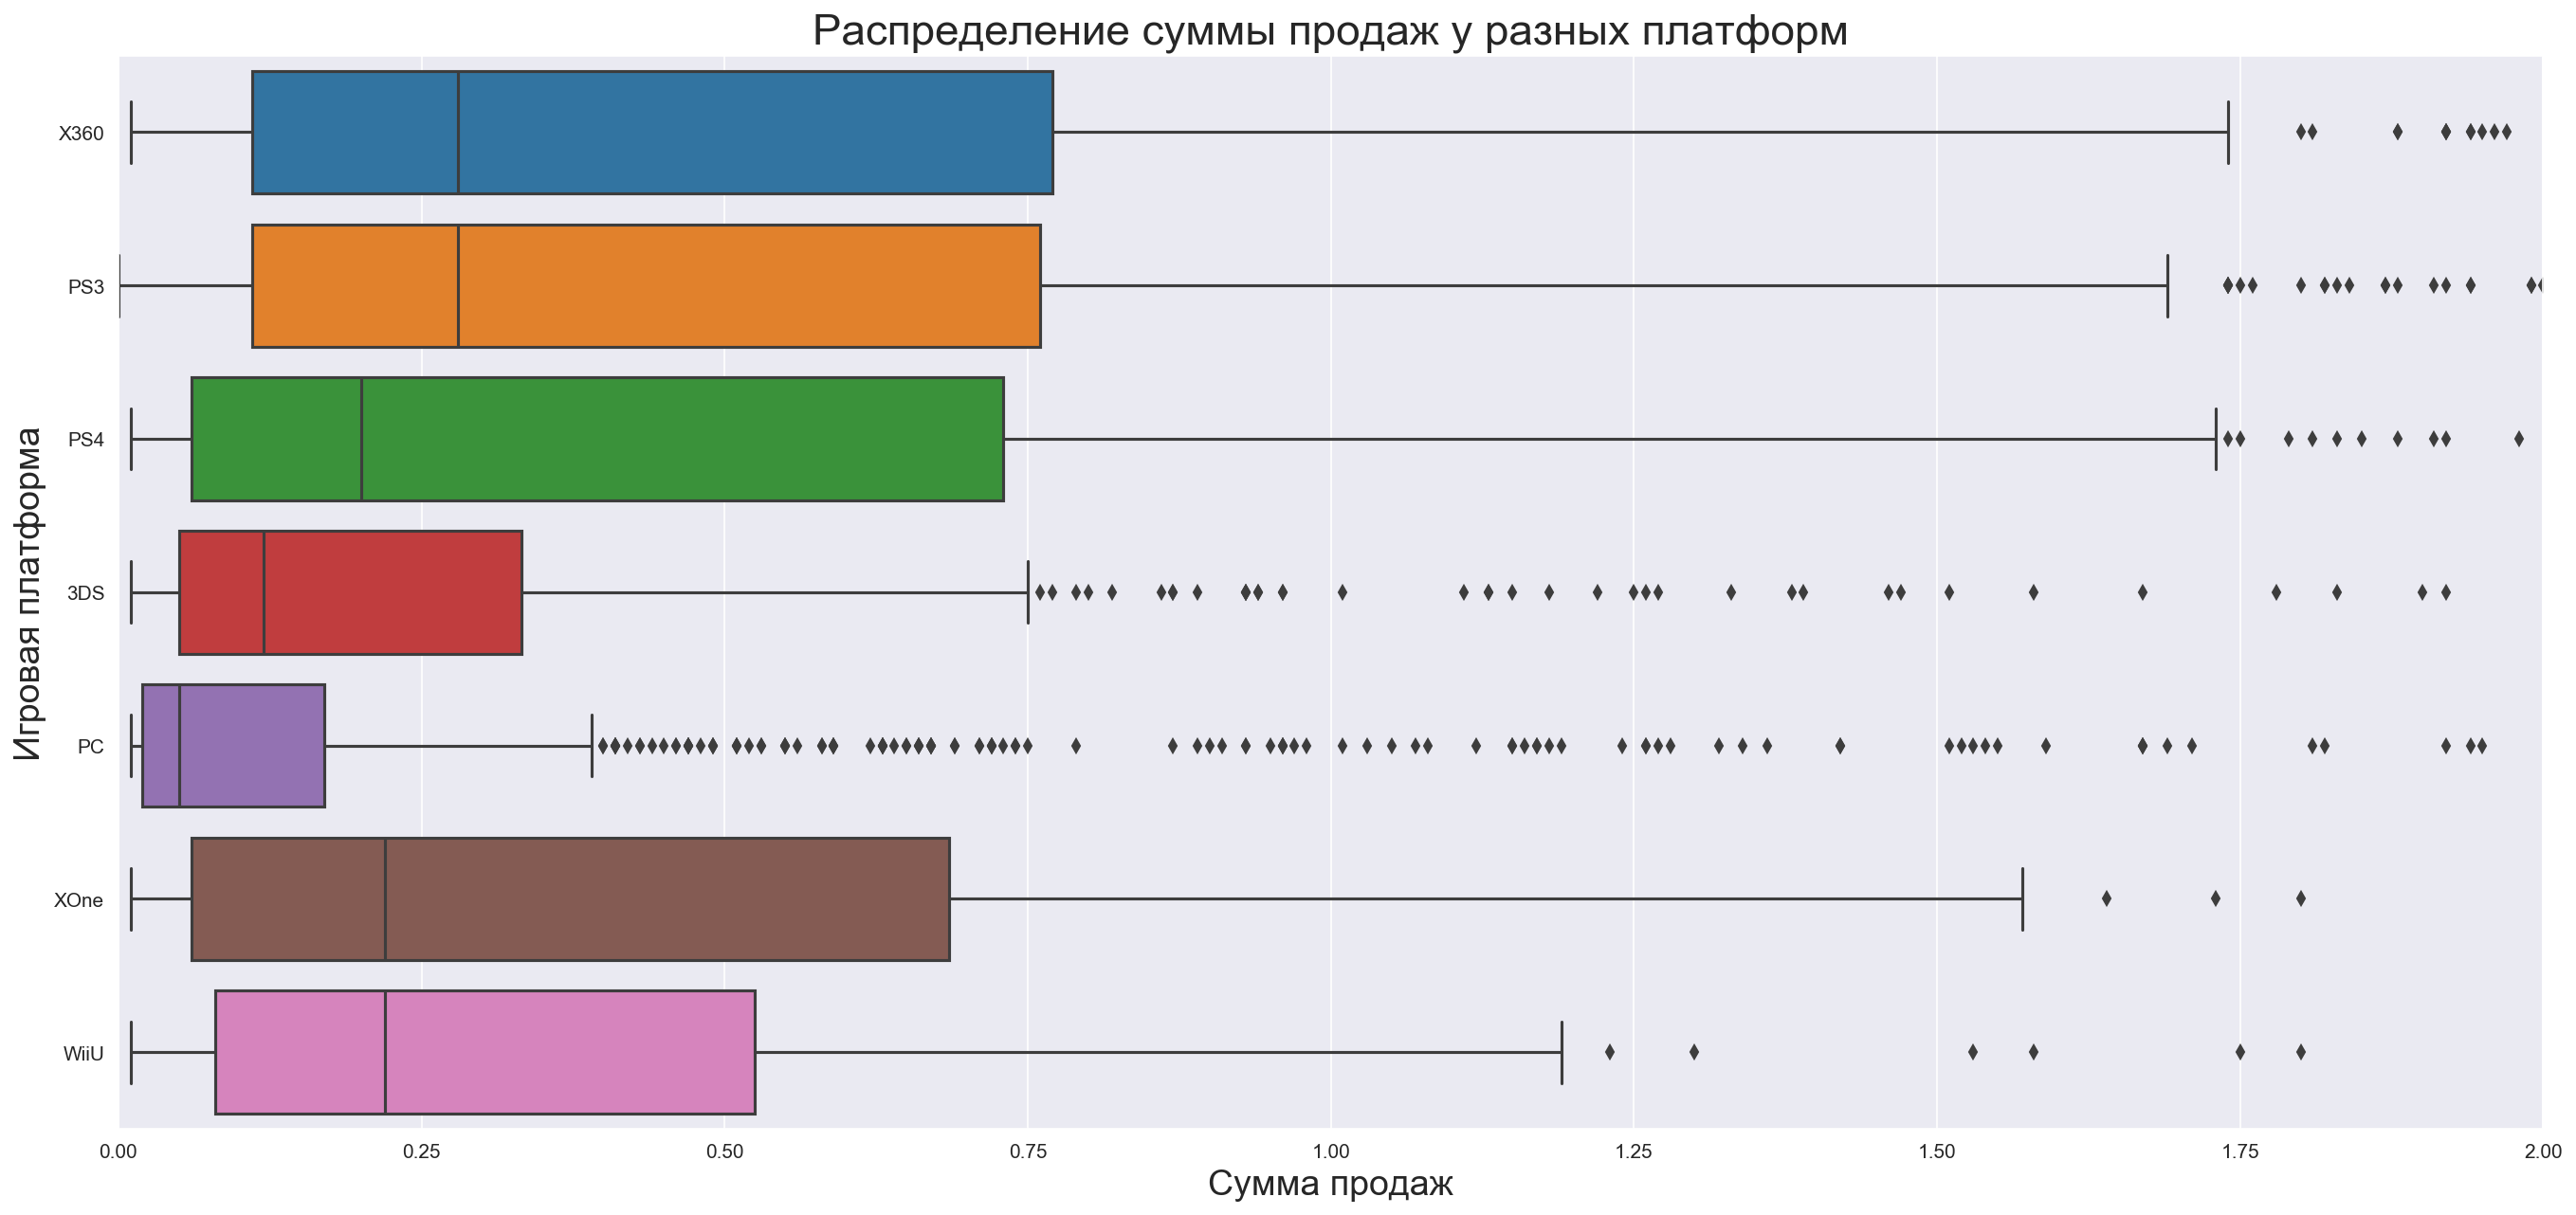

In [35]:
# диаграмма размаха
plt.figure(figsize=(22,10), dpi=150)
plt.grid(True)

sns.boxplot(
    data=df[df['platform'].isin(top_7_platform)],
    y='platform',
    x='sum_sales'
)
plt.xlim([0,2])
plt.title('Распределение суммы продаж у разных платформ', fontsize=22)
plt.xlabel('Сумма продаж', fontsize=18)
plt.ylabel('Игровая платформа', fontsize=18);

In [36]:
df_actual.sort_values(by='sum_sales', ascending=False).head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rank,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rank,11.68


**Вывод**

Построив график "ящик с усами" для семи платформ с наибольшей суммой продаж в последние годы можно сделать вывод, что:

* Лидерами определенно можно считать платформы от Sony и Microsoft *(следом за ними WiiU от Nintendo)*
* По медианной сумме продаж наилучшие результаты показали приставки от Microsoft (XOne и X360).
* Выбросы это наиболее успешные игры: 
    * Call of Duty: Black Ops 3 и GTA V **для PS4**
    * Pokemon Omega Ruby/Pokemon Alpha Sapphire **для 3DS**

### Оценим влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы

  * В качестве популярной платформы возьмем PS4 от Sony.
  * Построим диаграмму рассеяния и посчитаем кореляцию: отзывы-продажи. 

In [37]:
df_ps4 = df_actual.query('platform == "PS4"')
print('Доля пропущенных значений в оценках критиков для игр на PS4 {:.1%}'.format(
    df_ps4['critic_score'].isna().sum() / df_ps4.shape[0]))
print('Доля пропущенных значений в оценках пользователей для игр на PS4 {:.1%}'.format(
    df_ps4['user_score'].isna().sum() / df_ps4.shape[0]))

Доля пропущенных значений в оценках критиков для игр на PS4 37.0%
Доля пропущенных значений в оценках пользователей для игр на PS4 35.6%


* Около трети игр не имеют оценки пользователей или критиков, будем работать с оставшимися данными.
* `critic_score` и `user_score` имеют распределения разных порядков, поэтому на один график их не поместить.

Создадим функцию для построения графика и расчета корреляции.

Корреляция между продажами и оценкой критиков для платформы PS4 0.403
Корреляция между продажами и оценкой пользователей для платформы PS4 -0.04


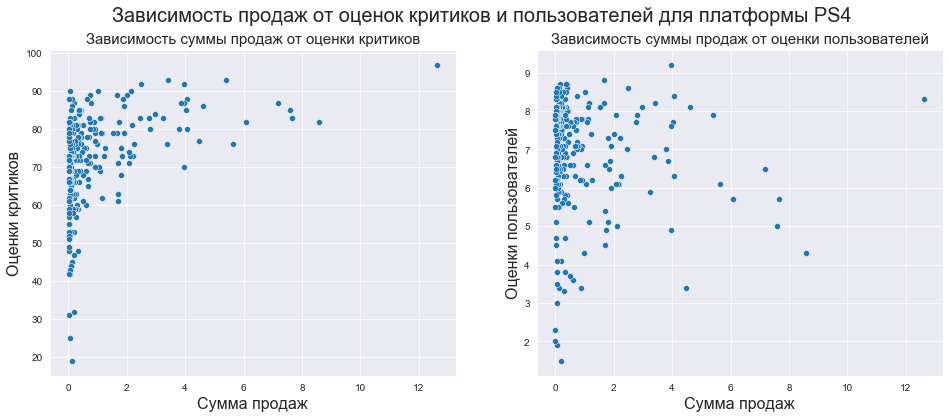

In [38]:
def user_critic_scatter(platform):
    df_platform = df_actual.query('platform == @platform')
    fig, ax = plt.subplots(1,2, figsize=(16, 6))
    fig.suptitle(f'Зависимость продаж от оценок критиков и пользователей для платформы {platform}', fontsize=20)
    
    ax1 = sns.scatterplot(
        data=df_platform,
        x='sum_sales',
        y='critic_score',
        ax=ax[0])
    ax1.set_title('Зависимость суммы продаж от оценки критиков', fontsize=15)
    ax1.set_xlabel('Сумма продаж', fontsize=16)
    ax1.set_ylabel('Оценки критиков', fontsize=16)

    ax2 = sns.scatterplot(
        data=df_platform,
        x='sum_sales',
        y='user_score',
        ax=ax[1]);
    ax2.set_title('Зависимость суммы продаж от оценки пользователей', fontsize=15)
    ax2.set_xlabel('Сумма продаж', fontsize=16)
    ax2.set_ylabel('Оценки пользователей', fontsize=16);
    sns.set_style('darkgrid')
    

    print(f'Корреляция между продажами и оценкой критиков для платформы {platform}',
          round(df_platform['sum_sales'].corr(df_platform['critic_score']), 3))
    print(f'Корреляция между продажами и оценкой пользователей для платформы {platform}',
          round(df_platform['sum_sales'].corr(df_platform['user_score']), 3))

user_critic_scatter('PS4')

**Вывод**
* Присутствует слабая положительная корреляция между оценками критиков и продажами
* Корреляция между оценками пользователей и продажами отсутствует

### Соотнесем выводы с продажами игр на других платформах

Посмотрим те же самые распределения для других популярных плафторм из нашего топ-7, например:
* XOne
* 3DS,
* PS3

Корреляция между продажами и оценкой критиков для платформы XOne 0.429
Корреляция между продажами и оценкой пользователей для платформы XOne -0.07
Корреляция между продажами и оценкой критиков для платформы 3DS 0.314
Корреляция между продажами и оценкой пользователей для платформы 3DS 0.215
Корреляция между продажами и оценкой критиков для платформы PS3 0.447
Корреляция между продажами и оценкой пользователей для платформы PS3 -0.167


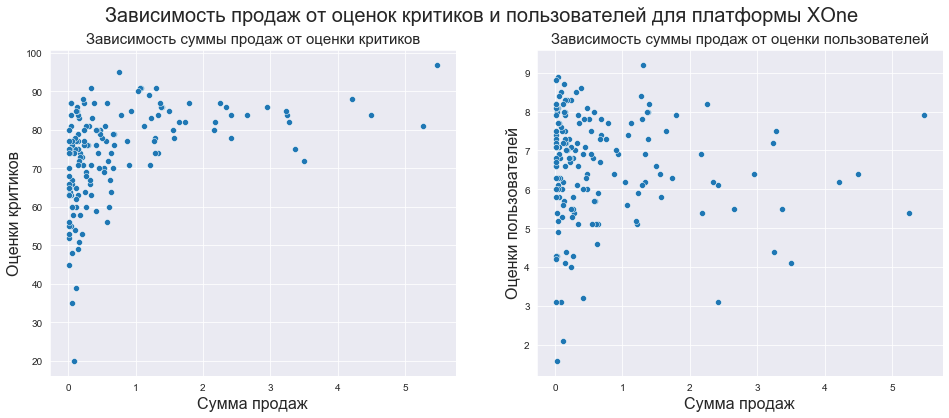

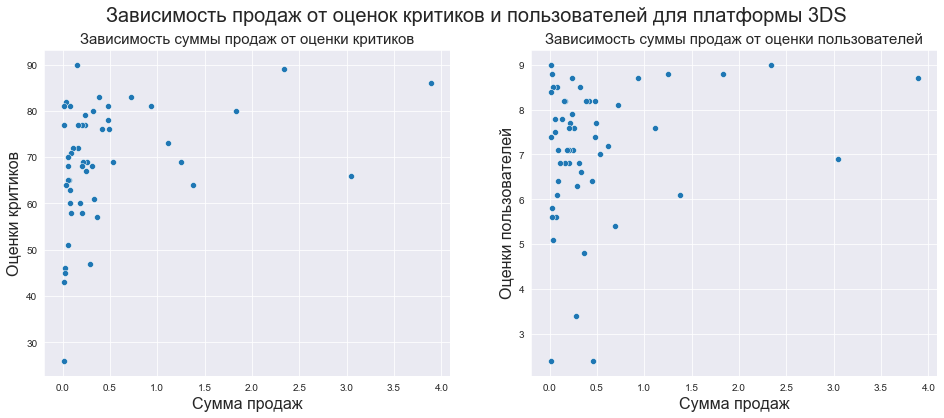

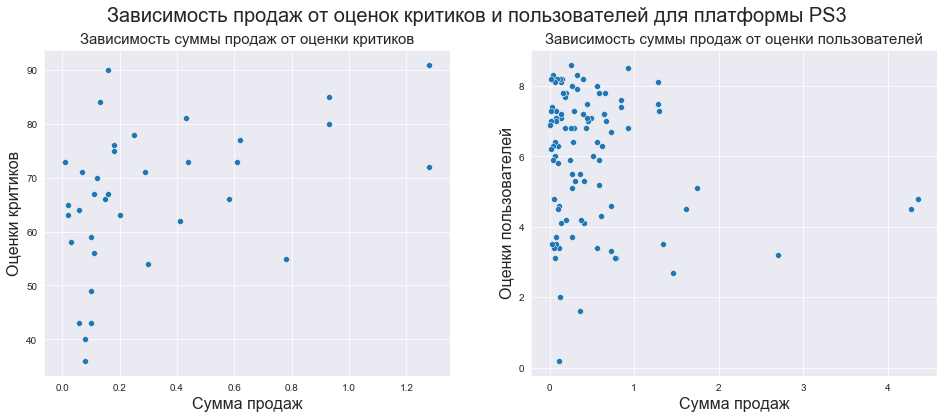

In [39]:
user_critic_scatter('XOne')
user_critic_scatter('3DS')
user_critic_scatter('PS3')

**Вывод** 
* Предыдущий вывод можно сделать и для этих платформ:
    * Корреляция с оценками критиков слабая положительная
    * Корреляция с оценками пользователей отсутствует

### Оценка распределения игр по жанрам. Какие жанры самые прибыльные? Выделяются ли жанры с высокими и низкими продажами?

In [40]:
df_actual.groupby('genre')['name'].agg('count').sort_values(ascending=False)

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: name, dtype: int64

**Action, RPG и Adventure** - 3 наиболее популярных жанра, в которых выпускается наибольшее количество игр.

Теперь посмотрим на продажи: однако, нам нужно как-то нормализовать суммарные продажи, потому что игр разных жанров выпускалось разное количество, соответственно и сумма продаж будет больше у жанров с бОльшим количеством игр. Используем для этого среднее значение продаж в сводной таблице.

In [41]:
df_actual.pivot_table(index='genre', aggfunc={'sum_sales':['mean', 'median']}).sort_values(by=('sum_sales','median'), ascending=False)

sum_sales       
                  mean median
genre                        
Shooter       1.335469  0.515
Sports        0.680000  0.180
Platform      0.476053  0.140
Fighting      0.470333  0.125
Role-Playing  0.459005  0.110
Simulation    0.298409  0.100
Action        0.322068  0.090
Misc          0.332301  0.090
Racing        0.398841  0.090
Strategy      0.107027  0.060
Puzzle        0.157857  0.045
Adventure     0.094865  0.030

Построим диаграмму размаха для суммы продаж по жанрам, для того,чтобы оценить наиболее прибыльные жанры.

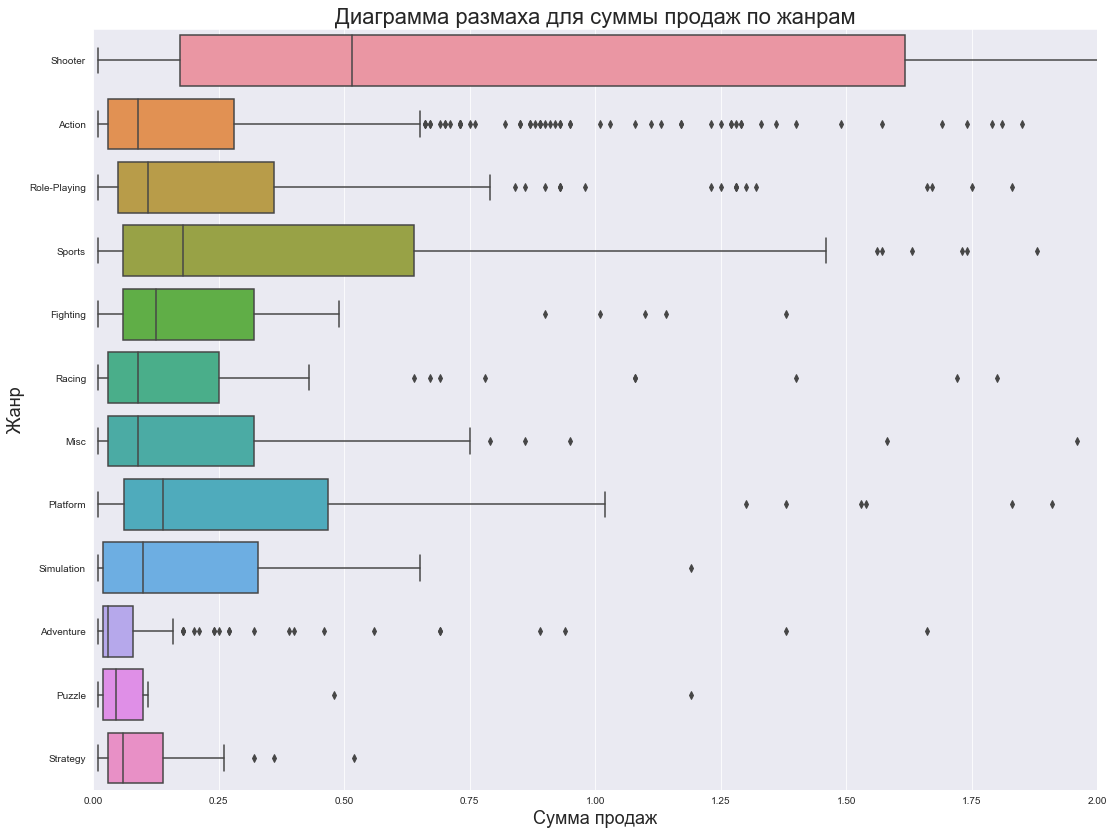

In [42]:
plt.figure(figsize=(18,14))
plt.grid(True)

sns.boxplot(
    data=df_actual,
    y='genre',
    x='sum_sales'
)
plt.xlim([0,2])
plt.title('Диаграмма размаха для суммы продаж по жанрам', fontsize=22)
plt.xlabel('Сумма продаж', fontsize=18)
plt.ylabel('Жанр', fontsize=18);

**Оценка жанров по медиане**

* Здесь мы видим такую же тройку лидеров: Shooter, Sports, Platform.
* При том **шутеры в разы популярнее других жанров** по обоим показателям: и по медиане, и по третьему квартилю.

**Вывод**
* Оцениваем прибыльность жанра по **по среднему и медианному количеству проданных копий**:
    * **Первое место** заслуженно занимают **шутеры**, сразу можно вспомнить множество популярных игр (Left 4 Dead, Half-life, Far Cry, Counter-Strike и т.д.) - почти 1 млн копий продано на каждую выпущенную игру;
    * На **втором месте жанр спортивных игр**;
    * **Третье место у платформеров**.
* Наименее прибыльные жанры: паззлы, приключения и стратегия

## Портрет пользователя каждого региона

Для пользователей из Северной Америки, Европы, Японии и других стран.

### Самые популярные платформы (топ-5). Различия в долях продаж.

Здесь стоит вывести сводные таблицы, поэтому удобно будет взглянуть на них рядом. Для этого удалось найти функцию, коллег, которая выводит несколько таблиц в одном ряду.

In [43]:
def display_side_by_side(*args):
    html_str=' '
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

Следующая функция группирует датасет по платформам для конкретного региона, сортирует по сумме продаж в этом регионе и суммирует все платформы, кроме топ-5 в индекс 'other'. А также строит круговую диаграмму для этих 5+1 платформ.

In [44]:
def top_5(sign, region):
    result = df_actual.groupby(sign)[[region, 'sum_sales']].sum().sort_values(by=region, ascending=False)
    result.loc['other'] = result.iloc[5:,:].sum()
    result = result.sort_values(by=region, ascending=False).head(6)
    
    region_dict = {'na_sales':'Северная Америка', 'eu_sales':'Европа', 'jp_sales':'Япония', 'other_sales':'Другие страны'}
    sign_dict = {'platform':'платформы', 'genre':'жанры'}
    
    result.plot(
    kind='pie',
    y=region,
    figsize=(6,8), 
    autopct='%.0f%%'
)
    plt.title(f'Популярные {sign_dict.get(sign)} в регионе {region_dict.get(region)}', fontsize=22)
    plt.ylabel('Cумма продаж', fontsize=18);
    return result

,na_sales,sum_sales
platform,,
PS4,98.61,288.15
XOne,81.27,140.36
other,31.19,97.86
X360,28.30,48.22
3DS,22.64,86.68
PS3,22.05,68.18
,eu_sales,sum_sales
platform,,
PS4,130.04,288.15


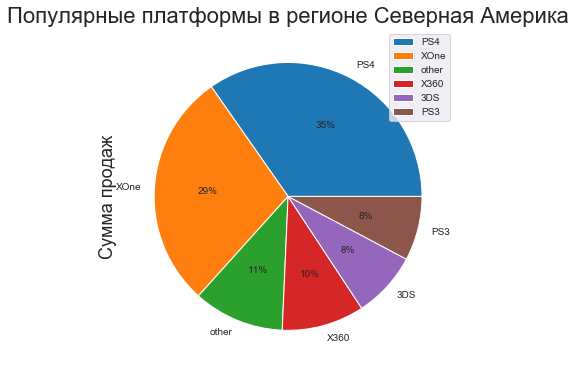

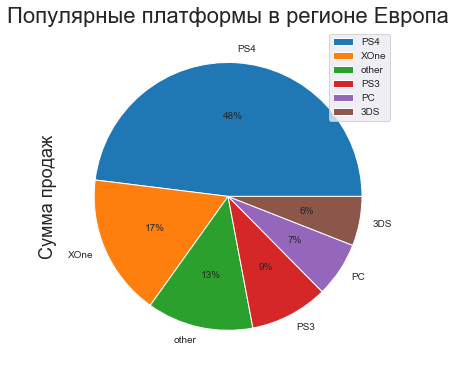

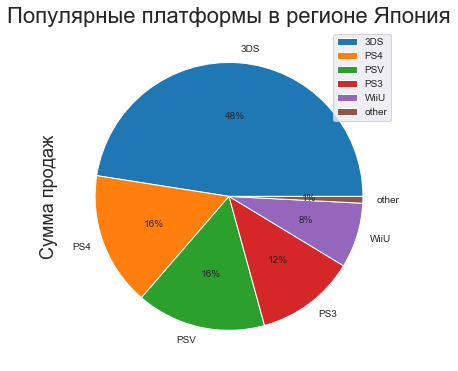

In [45]:
display_side_by_side(top_5('platform', 'na_sales'), top_5('platform', 'eu_sales'), top_5('platform', 'jp_sales'))

**Северная Америка**
* Первое место по популярности делят платформы X360 от Microsoft и PS4 от Sony
* Далее примерно равные доли у платформ: X360, 3DS, PS3 и у других вместе взятых.

**Европа**
* Первое место по количеству продаж и почти половину рынка занимает платформа PS4 от Sony
* 2 место у платформы X360 от Microsoft
* Единственный регион, у которого платформа PC попала в топ-5

**Япония**
* В топе нет Microsoft: только Nintendo и Sony *(Японские компании)*
* Самая популярная платформа здесь 3DS, занимает почти половину рынка
* Оставшуюся половину делят PS4, PSV, PS3 и WiiU


**Взглянем также на игроков из других стран**

,other_sales,sum_sales
platform,,
PS4,44.48,288.15
XOne,12.52,140.36
PS3,9.37,68.18
other,7.22,97.86
X360,4.35,48.22
3DS,3.68,86.68


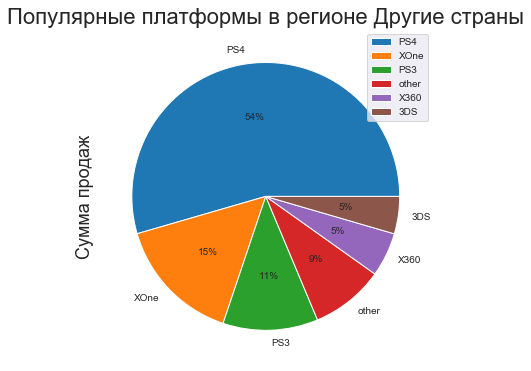

In [46]:
top_5('platform', 'other_sales')

**Другие страны**
* Самая популярная платформа - PS4
* На втором месте XOne
* В целом максимальная схожесть с Европейским регионом

### Самые популярные жанры (топ-5).

,na_sales,sum_sales
genre,,
Shooter,79.02,170.94
Action,72.53,199.36
Sports,46.13,109.48
other,37.86,110.68
Role-Playing,33.47,101.44
Misc,15.05,37.55
,eu_sales,sum_sales
genre,,
Action,74.68,199.36


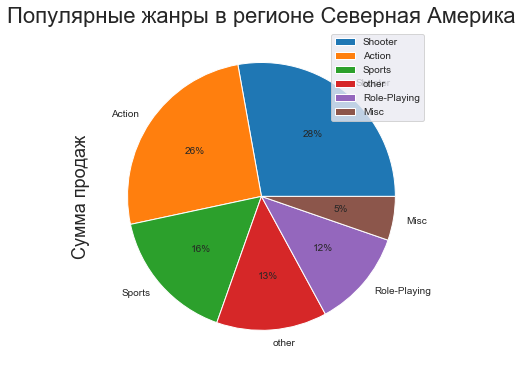

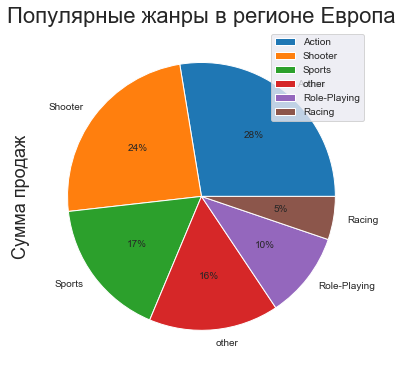

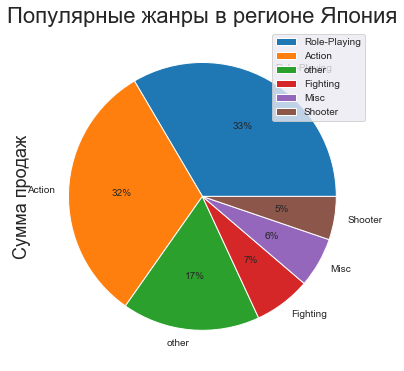

In [47]:
display_side_by_side(top_5('genre', 'na_sales'), top_5('genre', 'eu_sales'), top_5('genre', 'jp_sales'))

,other_sales,sum_sales
genre,,
Action,22.57,199.36
Shooter,21.53,170.94
Sports,14.36,109.48
other,10.49,110.68
Role-Playing,8.64,101.44
Misc,4.03,37.55


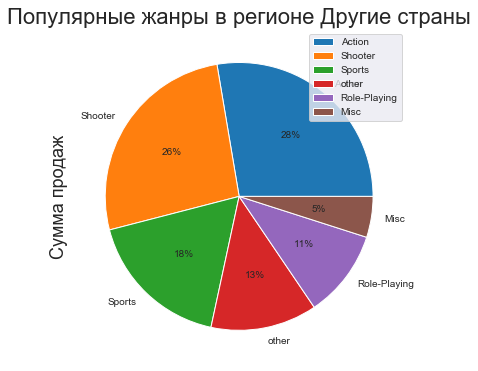

In [48]:
top_5('genre', 'other_sales')

**Вывод**
* Во всех категориях (Северная Америка, Европа, Япония, другие страны) в топ-5 присутствуют жанры Action и Shooter.
* Жанровые предпочтения игроков из Северной Америки и Европы по топ-5 практически совпадают совпадают: Action, Sports, Shooter  и RPG.
* Предпочтения Японии отличаются - на первом месте игры жанра RPG, после них Action, а на все остальные жанры приходится около 1/3 игр.
* В других странах картина распределения жанров похожа на европейскую.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [49]:
# произведем подсчет рейтинга
df_actual['rating'].value_counts()

no_rank    749
T          271
M          265
E          219
E10+       185
Name: rating, dtype: int64

Построим относительное распределения рейтинга игр в разных регионах

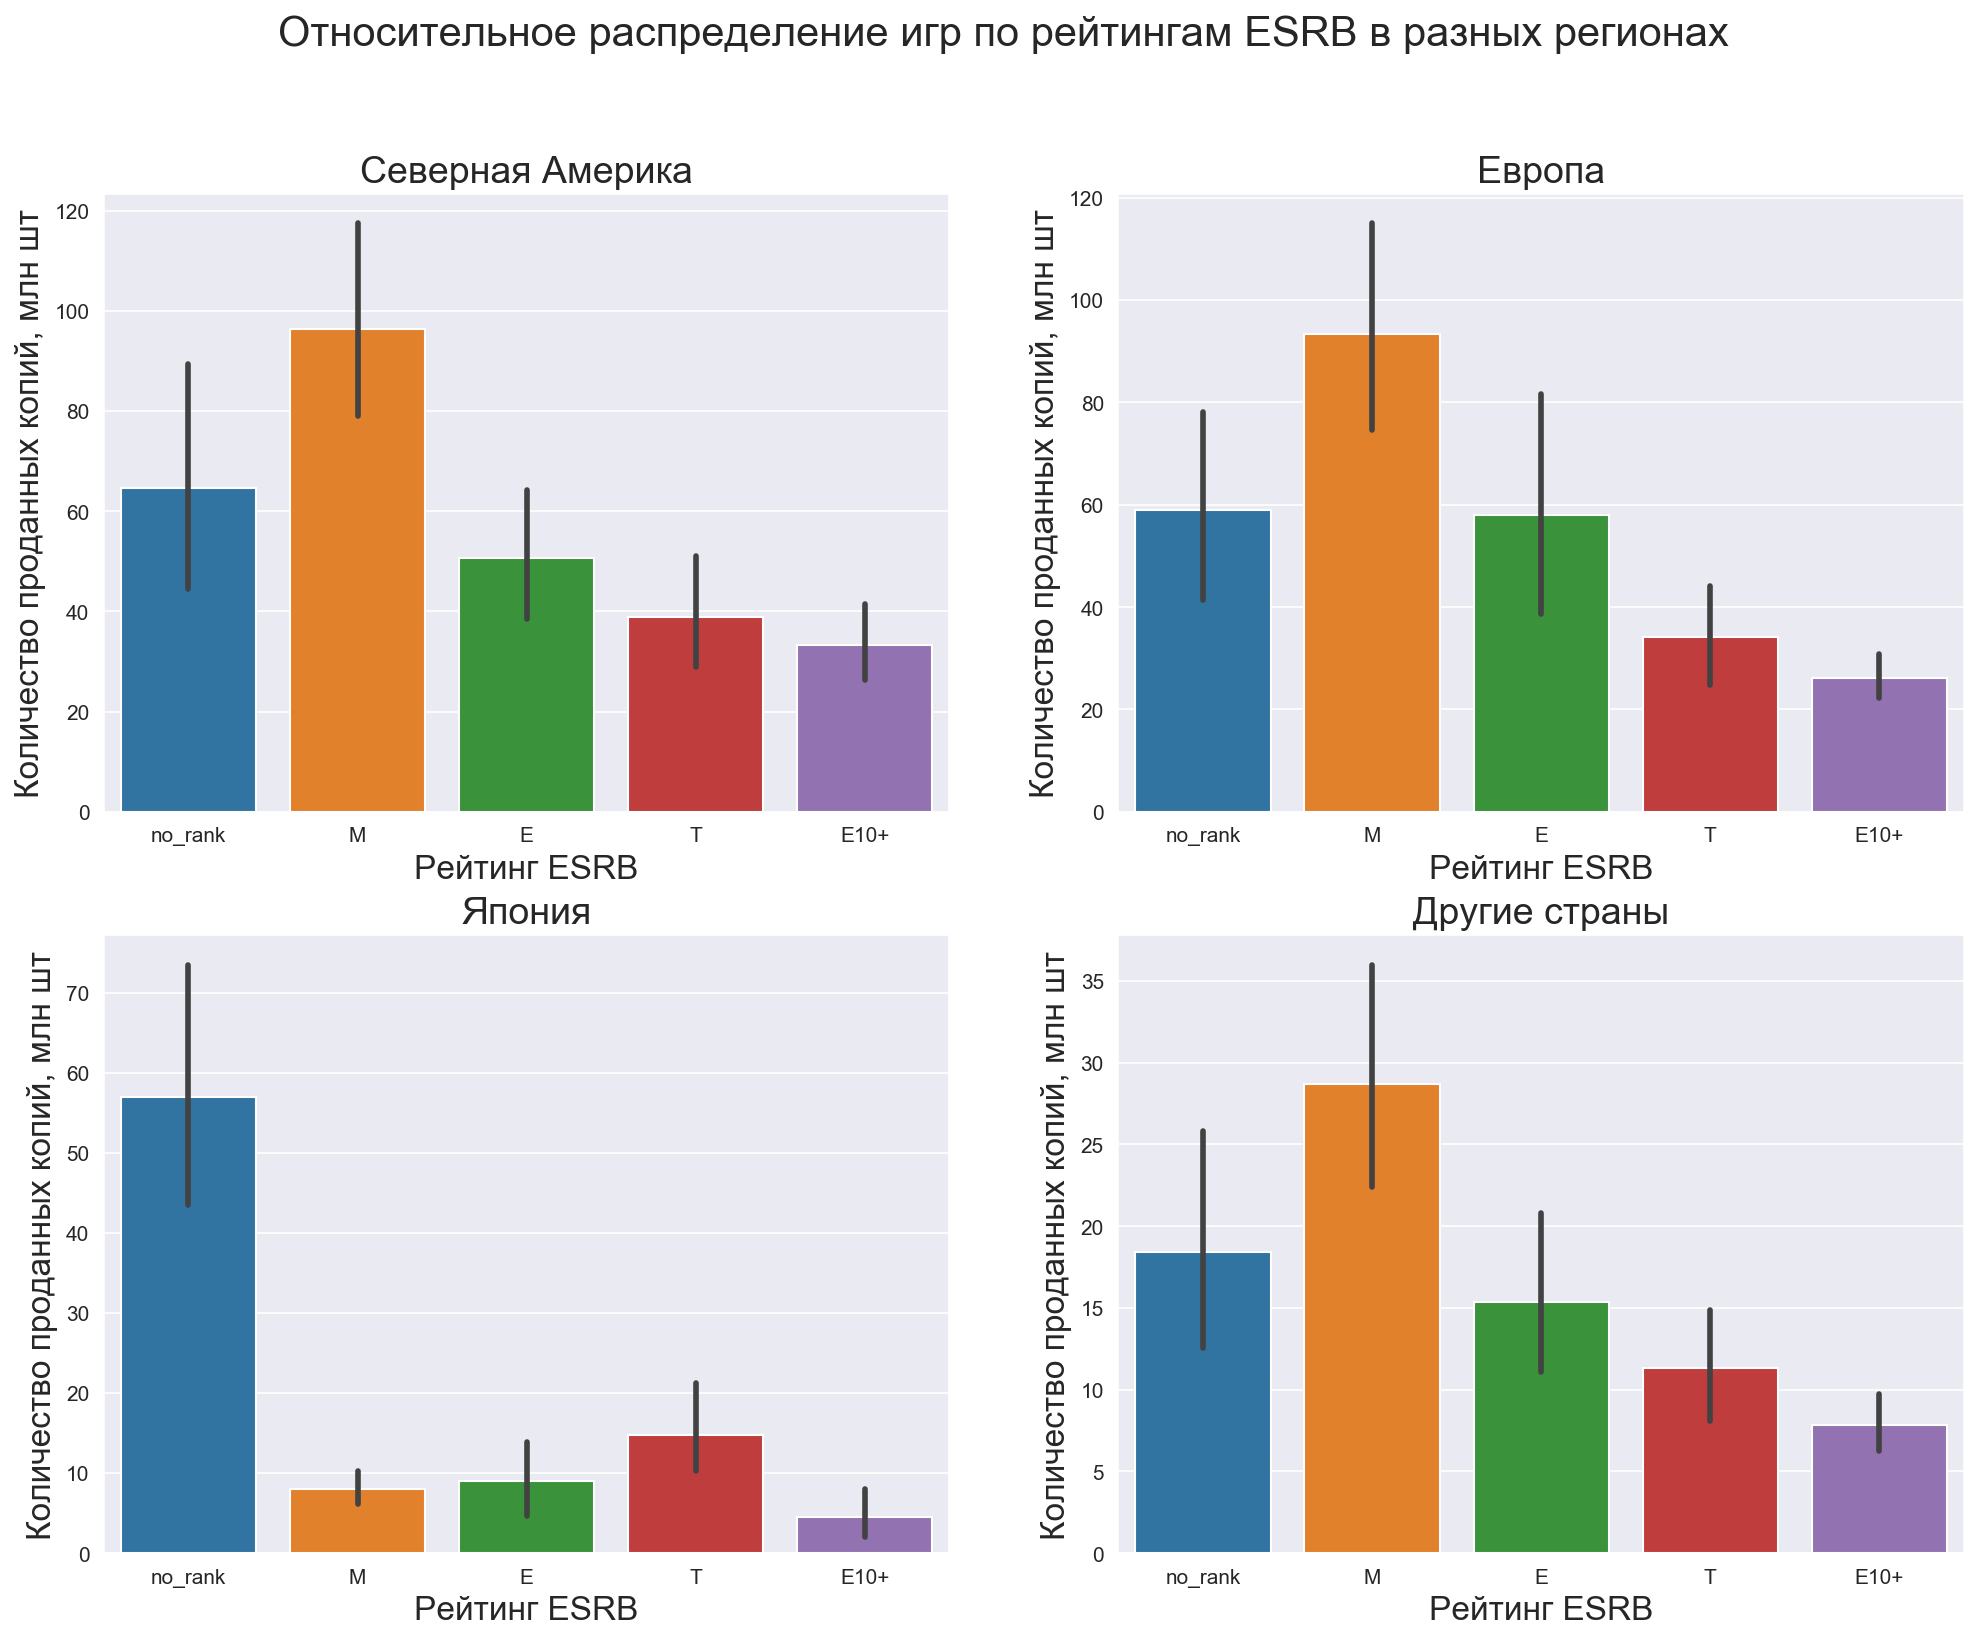

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), dpi=150)
fig.suptitle(f'Относительное распределение игр по рейтингам ESRB в разных регионах', fontsize=20)

# столбчатая диаграмма продаж для североамериканского региона
sns.barplot(
        data=df_actual,
        x='rating',
        y='na_sales',
        estimator=np.sum,
        ax=axs[0,0])
axs[0,0].set_title('Северная Америка', fontsize=18)
axs[0,0].set_xlabel('Рейтинг ESRB', fontsize=16)
axs[0,0].set_ylabel('Количество проданных копий, млн шт', fontsize=16)

# столбчатая диаграмма продаж для европейского региона
sns.barplot(
        data=df_actual,
        x='rating',
        y='eu_sales',
        estimator=np.sum,
        ax=axs[0,1]);
axs[0,1].set_title('Европа', fontsize=18)
axs[0,1].set_xlabel('Рейтинг ESRB', fontsize=16)
axs[0,1].set_ylabel('Количество проданных копий, млн шт', fontsize=16)
    
# столбчатая диаграмма продаж для японского региона
sns.barplot(
        data=df_actual,
        x='rating',
        y='jp_sales',
        estimator=np.sum,
        ax=axs[1,0]);
axs[1,0].set_title('Япония', fontsize=18)
axs[1,0].set_xlabel('Рейтинг ESRB', fontsize=16)
axs[1,0].set_ylabel('Количество проданных копий, млн шт', fontsize=16)

# столбчатая диаграмма продаж для других стран
sns.barplot(
        data=df_actual,
        x='rating',
        y='other_sales',
        estimator=np.sum,
        ax=axs[1,1]);
axs[1,1].set_title('Другие страны', fontsize=18)
axs[1,1].set_xlabel('Рейтинг ESRB', fontsize=16)
axs[1,1].set_ylabel('Количество проданных копий, млн шт', fontsize=16);

**Вывод**

* Портреты игроков **в Европе и Северной Америке** и в категории другие страны похожи:
    * Наиболее популярны игры с рейтингом M (для взрослых)
    * На втором месте с примерно одинаковой долей игры с рейтингами E (для всех) и игры без рейтинга
    * Третье место игры T (для подростков)
    * На последнем месте игры с рейтингом E 10+ (для всех игроков старше 10 лет)
* Портрет игрока **в Японии** отличается:
    * Подавляющее большинство игр не получает оценку от ESRB
    * Игры с рейтингом ESRB по убыванию популярности: T (для подростков), E (для всех), М (для взрослых), E 10+ (для всех старше 10 лет).
* Существенное количество копий было продано без присвоенного рейтинга во всех регионах.

## Проверка гипотез
### Средние пользовательские рейтинги платформ Xbox One и РС одинаковые;

**Нулевая гипотеза:** Средний пользовательский рейтинг платформы XOne равен среднему пользовательскому рейтингу платформы PC.

**Альтернативная гипотеза:** Средние пользовательские рейтинги платформ XOne и PC различаются.

Для проверки будем использовать t-критерий для двух выборок. Дисперсии двух генеральных совокупностей считаем равными.
За уровень значимости берем alpha = 0.05

**Для достоверности расчета р-value нам необходимо случайным образом подобрать выборки равного размера. Для этого будем использовать функцию `sample` из библиотеки Pandas. Сперва посчитаем, какого размера получаются выборки, если отбросить пропущенные значения.**

In [51]:
df_actual.query('platform == "XOne"')['user_score'].dropna().shape[0]

165

In [52]:
df_actual.query('platform == "PC"')['user_score'].dropna().shape[0]

122

In [53]:
alpha = .05

sample_1 = df_actual.query('platform == "XOne"')['user_score'].dropna().sample(122)
sample_2 = df_actual.query('platform == "PC"')['user_score'].dropna().sample(122)

results = st.ttest_ind(
    sample_1,sample_2
)

print(f'Среднее значение рейтинга критиков для платформы "XOne:" {round(sample_1.mean(),1)}')
print(f'Среднее значение рейтинга критиков для платформы "PC:" {round(sample_2.mean(),1)}\n')

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print(f'На имеющихся данных на уровне значимости {alpha}\
 есть основания отвергнуть нулевую гипотезу в пользу альтернативной')
else:
    print(f'На имеющихся данных на уровне значимости {alpha}\
 нет оснований отвергнуть нулевую гипотезу в пользу альтернативной')

Среднее значение рейтинга критиков для платформы "XOne:" 6.6
Среднее значение рейтинга критиков для платформы "PC:" 6.3

p-значение: 0.0989306922564253
На имеющихся данных на уровне значимости 0.05 нет оснований отвергнуть нулевую гипотезу в пользу альтернативной


**Вывод**

Средний пользовательский рейтинг платформы XOne **равен** среднему пользовательскому рейтингу платформы PC.

### Средние пользовательские рейтинги жанров Action и Sports разные

**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports равны.

**Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки будем использовать t-критерий для двух выборок. Дисперсии двух генеральных совокупностей считаем равными.
За уровень значимости берем alpha = 0.05

In [54]:
df_actual.query('genre == "Action"')['user_score'].dropna().shape[0]

297

In [55]:
df_actual.query('genre == "Sports"')['user_score'].dropna().shape[0]

127

In [56]:
alpha = .05

sample_1 = df_actual.query('genre == "Action"')['user_score'].dropna().sample(127)
sample_2 = df_actual.query('genre == "Sports"')['user_score'].dropna().sample(127)

results = st.ttest_ind(
    sample_1, sample_2
)

print(f'Среднее значение пользовательского рейтинга для жанра "Action:" {round(sample_1.mean(),1)}')
print(f'Среднее значение пользовательского рейтинга для жанра "Sports:"  {round(sample_2.mean(),1)}\n')

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print(f'На имеющихся данных на уровне значимости {alpha}\
 есть основания отвергнуть нулевую гипотезу в пользу альтернативной')
else:
    print(f'На имеющихся данных на уровне значимости {alpha}\
 нет оснований отвергнуть нулевую гипотезу в пользу альтернативной')

Среднее значение пользовательского рейтинга для жанра "Action:" 6.7
Среднее значение пользовательского рейтинга для жанра "Sports:"  5.2

p-значение: 3.2135967642735577e-12
На имеющихся данных на уровне значимости 0.05 есть основания отвергнуть нулевую гипотезу в пользу альтернативной


**Вывод**

Cредние пользовательские рейтинги для жанров Action и Sports **различаются**.

## Общий вывод

**В мире существует 3 основных производителя видеоигр**: 
* Sony (Япония)
* Nintendo (Япония)
* Microsoft (США)

**Самые продаваемые игры за период времени с 1980 по 2016 год были выпущены для платформ**:
1. PS2
2. X360
3. PS3
4. Wii
5. DS
6. PS

По результатам проекта выявлены следующие факты:
* **Среднее время жизни платформы** около 6-8 лет;
* **Пик продаж** наступает спустя 5 лет от выхода платформы на рынок;
    * Пик продаж за всё время существования игр для приставок был достигнут в 2008-2010 годах и с тех пор тренд продаж только на снижение;
* Появление платформы следующего поколения быстро отражается на продажах игр для платформы предыдущего поколения (например, падение продаж для PS2 при выходе PS3);
* **Корреляция между оценками пользователей и продажами** отсутствует. Ориентироваться на оценки пользователей в планировании бизнес-плана не стоит;
* **Корреляция между оценками критиков и продажами** слабая положительная, можно использоваться при планировании;
* В качестве **актуального периода для исследования** был выбран трёхлетний период релиза игр с 2014 по 2016
* **Самые популярные жанры игр** по количеству продаж актуальный период:
    1. Shooter;
    2. Sports;
    3. Platform;
* Наименее прибыльные жанры: Puzzle, Adventure и Strategy

* **Портрет пользователя каждого региона**
    * Северная Америка:
        * **Самые популярные платформы** с примерно равными долями рынка: X360 от Microsoft и PS4 от Sony
        * **Самые популярные жанры:** Action, Sports, Shooter и RPG.
   
    * Европа:
        * Первое место по количеству продаж и почти половину рынка занимает платформа PS4 от Sony
        * Второе место у платформы X360 от Microsoft
        * **Самый популярный жанр** - Action, Sports, Shooter и RPG
        
    * Япония:
        * В топ-5 платформ даже популярных платформ из других регионов: только Nintendo и Sony.
        * Самая популярная платформа здесь 3DS, занимает почти половину рынка
        * Оставшуюся половину делят PS4, PSV, PS3 и WiiU
        * **Самый популярный жанр** - RPG
        * На втором месте шутеры, а на все остальные жанры приходится около 1/3 игр.

* **Рейтинг ESRB**: 
    * ***В Северной Америке и Европе*** наиболее популярны игры с рейтингом М (для взрослых), на втором месте игры с рейтингом E (для всех) и игры без рейтинга, на 3-4 месте игры с рейтингом T (для подростков) и E-10 (для всех игроков старше 10 лет).
    * ***В Японии*** картина иная: большая часть игр не имеет рейтинга, среди оценённых ESRB убывающая последовательность следующая: T (для подростков), E (для всех), М (для взрослых), E-10 (для всех старше 10 лет).
    
Таким образом, мы видим, что в разных регионах популярны разные жанры и разные платформы, самый особенный и отличающийся регион - Япония.

Проведя исследование выяснено, что oсновываясь на данных исследования, не представляется возможным выявить потенциально популярный в 2017 году продукт и рекомендовать проведение рекламных кампаний в этом направлении. Вероятно, снижение популярности игр для игровых платформ связано с бурным развитием игр для мобильных операционных систем.